<a href="https://colab.research.google.com/github/m-bashari-m/vehicle-color-recognition/blob/main/src/07_rgb_analyze%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/m-bashari-m/vehicle-color-recognition/main/src/utils.py

--2022-06-30 23:18:00--  https://raw.githubusercontent.com/m-bashari-m/vehicle-color-recognition/main/src/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11845 (12K) [text/plain]
Saving to: ‘utils.py’

utils.py            100%[===================>]  11.57K  --.-KB/s    in 0s      

2022-06-30 23:18:00 (123 MB/s) - ‘utils.py’ saved [11845/11845]



In [2]:
from google.colab import drive
drive.mount('./drive')

Mounted at ./drive


In [2]:
import os

import tensorflow as tf
from tensorflow import keras

from utils import get_train_val_ds, ErrorAnalyzer, get_class_weight, get_model

In [3]:
BATCH_SIZE = 64
IMG_SIZE = (256, 256)
AUTOTUNE = tf.data.AUTOTUNE
N_CLASSES = 16

In [4]:
dataset_dir = os.path.join('drive', 'MyDrive', 'cars')
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'val')

In [5]:
_, val_ds = get_train_val_ds(train_dir, val_dir, batch_size=BATCH_SIZE, img_size=IMG_SIZE)

Found 16580 files belonging to 16 classes.
Found 3510 files belonging to 16 classes.


In [6]:
classes, _ = get_class_weight()

In [7]:
file_paths = val_ds.file_paths

In [8]:
rgb_ds = (
    val_ds.
    map(lambda img, lbl: (img/255., lbl), num_parallel_calls=AUTOTUNE).
    prefetch(AUTOTUNE))

In [9]:
model = get_model('rgb-model.h5')

In [10]:
analyzer = ErrorAnalyzer(model=model,
                         ds=rgb_ds,
                         file_paths=file_paths,
                         classes=classes,
                         model_name='RGB-model')

Making confusion matrix:


  0%|          | 0/55 [00:00<?, ?it/s]

Confusion matrix is saved


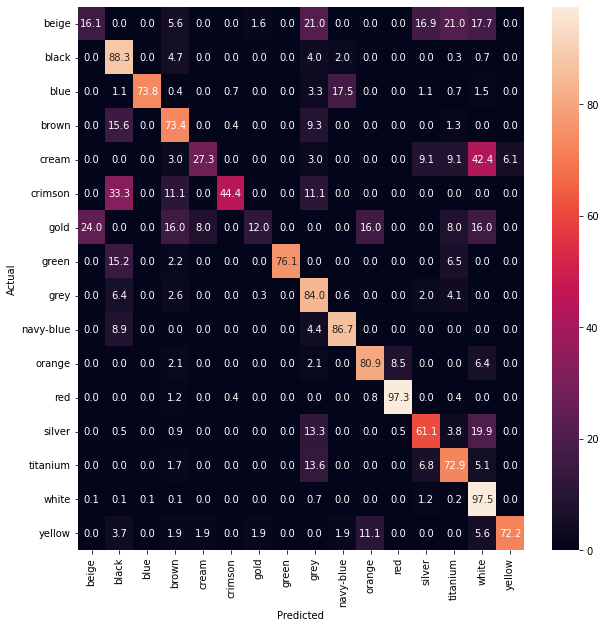

In [11]:
analyzer.plot_confusion_mat()

In [12]:
analyzer.evaluate_model()

Calculateing error types...
Writing in log file...
All done. Check log file => RGB-model.csv
Accuracy: %83.99
Precision mean: 0.7374
Recall mean: 0.665


# Best Model

Since RGB, combined v1 and v2 almost had same performance, I have used thier models to check errors more precisely, to decide about best model.

In [ ]:
for class_ in classes:
  analyzer.plot_missclassified(class_)

In [15]:
!zip -r rgb-stats.zip ./logs/statistic 

from google.colab import files
files.download('rgb-stats.zip')

  adding: logs/statistic/ (stored 0%)
  adding: logs/statistic/RGB-model-conf-mat.npy (deflated 75%)
  adding: logs/statistic/RGB-model.csv (deflated 81%)
  adding: logs/statistic/images/ (stored 0%)
  adding: logs/statistic/images/RGB-model-white.jpeg (deflated 20%)
  adding: logs/statistic/images/RGB-model-yellow.jpeg (deflated 23%)
  adding: logs/statistic/images/RGB-model-cream.jpeg (deflated 23%)
  adding: logs/statistic/images/RGB-model-green.jpeg (deflated 29%)
  adding: logs/statistic/images/RGB-model-black.jpeg (deflated 19%)
  adding: logs/statistic/images/RGB-model-grey.jpeg (deflated 15%)
  adding: logs/statistic/images/RGB-model-silver.jpeg (deflated 19%)
  adding: logs/statistic/images/RGB-model-beige.jpeg (deflated 13%)
  adding: logs/statistic/images/RGB-model-brown.jpeg (deflated 22%)
  adding: logs/statistic/images/RGB-model-titanium.jpeg (deflated 24%)
  adding: logs/statistic/images/RGB-model-navy-blue.jpeg (deflated 31%)
  adding: logs/statistic/images/RGB-model-re

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>